# exercise 10
## Task 1
Create a human mobility network for MA using the provided csv file.          

    network node: individual census block group (neighborhood) in MA
    network edge: residents from one neighborhood visiting another
    weight of network tie: percentage of residents from one neighborhood visiting another         

How many nodes and edges are there in your network? 

In [1]:
import os
import pandas as pd
os.chdir(r"C:\Users\[editted]\Documents\Me\BC\Advance\Data\jupyter\exercise10\MA_cbg_human_mobility_2019")
data = pd.read_csv("MA_cbg2cbg_2019_01.csv")

In [2]:
data

,poi_cbg,year_month,raw_device_counts,visitor_census_tract,visitor_count
0,250250303003,2019_1,19187,250250303003,413
1,250250303003,2019_1,19187,250251010016,182
2,250250303003,2019_1,19187,440070008003,122
3,250250303003,2019_1,19187,250250923002,121
4,250250303003,2019_1,19187,250173686001,112
...,...,...,...,...,...
840588,250214571001,2019_1,5506,250092046005,4
840589,250214571001,2019_1,5506,250056503002,4
840590,250214571001,2019_1,5506,250214164006,4
840591,250214571001,2019_1,5506,250173424003,4


In [3]:
data.describe()

,poi_cbg,raw_device_counts,visitor_census_tract,visitor_count
count,8.405930e+05,840593.000000,8.405930e+05,840593.000000
mean,2.501833e+11,4812.186621,2.601563e+11,6.734108
std,7.219058e+07,11085.392607,6.308833e+10,17.587996
min,2.500101e+11,9.000000,1.001021e+10,4.000000
25%,2.501381e+11,955.000000,2.501104e+11,4.000000
50%,2.501737e+11,1804.000000,2.501738e+11,4.000000
75%,2.502503e+11,4042.000000,2.502514e+11,5.000000
max,2.502776e+11,87858.000000,7.803099e+11,4400.000000


In [4]:
data.isna().sum()

poi_cbg                 0
year_month              0
raw_device_counts       0
visitor_census_tract    0
visitor_count           0
dtype: int64

In [5]:
data['year_month'].value_counts()

2019_1    840593
Name: year_month, dtype: int64

In [6]:
data['visitor_census_tract'].value_counts()

250173391004    832
250158204001    562
250173531011    550
250214202023    546
250059855001    531
               ... 
360790116001      1
60014443011       1
80319800001       1
240430103002      1
390599772002      1
Name: visitor_census_tract, Length: 40283, dtype: int64

In [7]:
import networkx as nx
#this is an edge list on a directed graph
net = nx.from_pandas_edgelist(data, source='poi_cbg', target='visitor_census_tract',
                              edge_attr='visitor_count', create_using=nx.DiGraph())

In [8]:
print("There are", len(net.nodes), "nodes and", len(net.edges), "edges")

There are 40292 nodes and 840593 edges


## Task 2
Calculate weighted node degree and unweighted node degree for each census block group in the mobility network and use the results to create a pandas dataframe. The dataframe should have three columns. One column stores the census block group id, and the other two the two calculated node degrees. 

In [9]:
block_degree = pd.DataFrame.from_dict(net.degree(weight='visitor_count'))

In [10]:
pd.DataFrame.from_dict(net.degree())[1].describe()

count    40292.000000
mean        41.725057
std        145.924906
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max      11857.000000
Name: 1, dtype: float64

In [11]:
block_degree.rename({1:'Weighted Degree'}, axis=1, inplace=True)

In [12]:
block_degree = pd.merge(block_degree, pd.DataFrame.from_dict(net.degree()), how='inner', on=0)

In [13]:
block_degree.rename({1:'Unweighted Degree'}, axis=1, inplace=True)

In [14]:
block_degree['Weighted Degree'].value_counts

<bound method IndexOpsMixin.value_counts of 0        18617
1         6117
2          582
3        11261
4        33463
         ...  
40287        4
40288        4
40289        4
40290        4
40291        4
Name: Weighted Degree, Length: 40292, dtype: int64>

That is the end of q2, however I was curious about the flow so I calculated another column after

In [15]:
block_degree = pd.merge(block_degree, pd.DataFrame.from_dict(net.in_degree(weight='visitor_count')), how='inner', on=0)

In [16]:
block_degree.rename({1:'Weighted Indegree'}, axis=1, inplace=True)

In [17]:
block_degree = pd.merge(block_degree, pd.DataFrame.from_dict(net.out_degree(weight='visitor_count')), how='inner', on=0)

In [18]:
block_degree.rename({1:'Weighted Outdegree'}, axis=1, inplace=True)

In [19]:
block_degree.head()

,0,Weighted Degree,Unweighted Degree,Weighted Indegree,Weighted Outdegree
0,250250303003,18617,3137,1953,16664
1,250251010016,6117,704,3674,2443
2,440070008003,582,77,582,0
3,250250923002,11261,702,10198,1063
4,250173686001,33463,3447,7551,25912


In [20]:
block_degree['Flow'] = block_degree['Weighted Indegree'] - block_degree['Weighted Outdegree']

In [21]:
block_degree.head()

,0,Weighted Degree,Unweighted Degree,Weighted Indegree,Weighted Outdegree,Flow
0,250250303003,18617,3137,1953,16664,-14711
1,250251010016,6117,704,3674,2443,1231
2,440070008003,582,77,582,0,582
3,250250923002,11261,702,10198,1063,9135
4,250173686001,33463,3447,7551,25912,-18361


In [22]:
block_degree.drop(['Weighted Indegree', 'Weighted Outdegree'], axis=1, inplace=True)

In [23]:
block_degree.head()

,0,Weighted Degree,Unweighted Degree,Flow
0,250250303003,18617,3137,-14711
1,250251010016,6117,704,1231
2,440070008003,582,77,582
3,250250923002,11261,702,9135
4,250173686001,33463,3447,-18361


## Task 3
Create a plot that visualizes the distribution of the weighted node degrees. Is the human mobility network a scale-free network? In other words, does the degree distribution follow a power law?

In [24]:
block_degree.sort_values('Weighted Degree', ascending=False, ignore_index=True, inplace=True)

In [25]:
block_degree.head()

,0,Weighted Degree,Unweighted Degree,Flow
0,250259813002,79019,11857,-69611
1,250173391004,48447,3973,-5747
2,250173686001,33463,3447,-18361
3,250250922003,28865,3241,-26391
4,250250106001,23429,3808,-17655


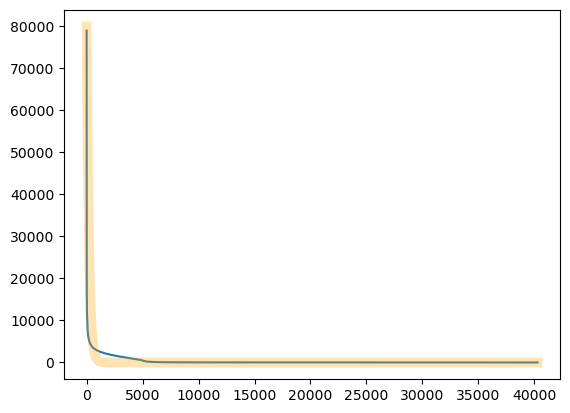

In [26]:
import matplotlib.pyplot as plt
plt.plot(block_degree.index, block_degree['Weighted Degree'])
powChart = [80000*0.995**x for x in range(len(block_degree))]
plt.plot(block_degree.index, powChart, color='orange', alpha=0.3, lw=7)
plt.show()

In [27]:
block_degree['Weighted Degree'].value_counts()

4        15119
8         5701
12        2848
16        1579
20        1019
         ...  
1232         1
1233         1
2226         1
3478         1
79019        1
Name: Weighted Degree, Length: 3100, dtype: int64

In [28]:
#it kinda looks like a powerlaw, would be easier to see if we only looked at the top values

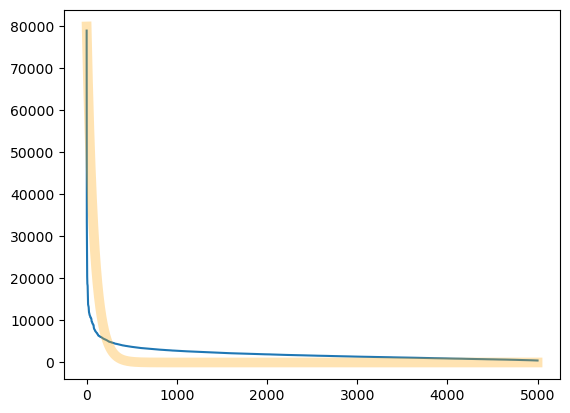

In [29]:
top_degrees = block_degree.head(5000)
plt.plot(top_degrees.index, top_degrees['Weighted Degree'])
powChart = [80000*0.988**x for x in range(len(top_degrees))]
plt.plot(top_degrees.index, powChart, color='orange', alpha=0.3, lw=7)
plt.show()

Overall it slightly follows a power law, but the dropoff for the first few values is much steeper than the later values to such an extent that a power law distribution cannot match it.

## Bonus task
Does this network follow the “six degrees of separation” principle? Find out ways to analyze the network to answer this question. [1 extra point] 

In [31]:
undir = net.to_undirected()

In [45]:
#in this case I did actually have the resources to calculate it out, though it took a while
#if it hadn't I would've sampled 500 points and taken the eccentricity of those points to estimate 
diam = nx.diameter(undir)

In [47]:
diam

6

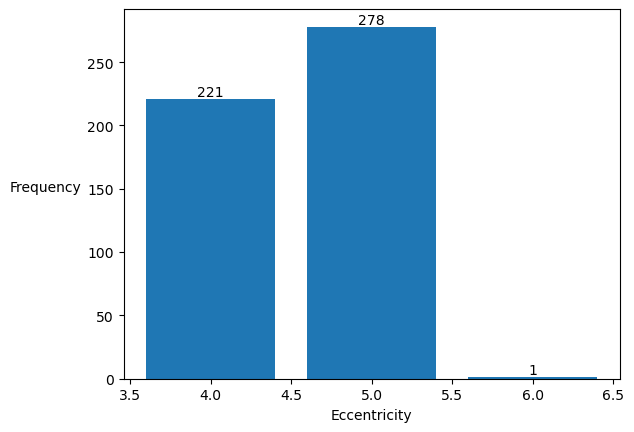

In [105]:
#might as well sample some points to see the distribution
import random
sample = random.sample(undir.nodes(), 500)
eccList = pd.DataFrame(columns=["Max Distance (eccentricity)"])
for node in sample:
    eccList.loc[len(eccList)] = nx.eccentricity(undir, node)
plot = plt.bar(eccList["Max Distance (eccentricity)"].unique(), eccList.value_counts())
plt.bar_label(plot, eccList.value_counts())
plt.ylabel('Frequency', rotation='horizontal', horizontalalignment='right')
plt.xlabel('Eccentricity')
plt.show()

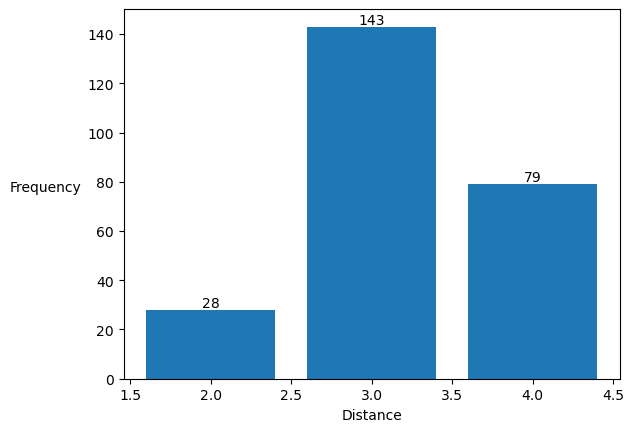

In [106]:
#might as well sample some points to see the distribution
import random
sample = random.sample(undir.nodes(), 500)
sample = [(sample[i], sample[i+1]) for i in range(0, len(sample), 2)]
distList = pd.DataFrame(columns=["Distance"])
for nodePair in sample:
    distList.loc[len(distList)] = nx.shortest_path_length(undir, nodePair[0], nodePair[1])
plot = plt.bar(distList["Distance"].unique(), distList.value_counts())
plt.bar_label(plot, distList.value_counts())
plt.ylabel('Frequency', rotation='horizontal', horizontalalignment='right')
plt.xlabel('Distance')
plt.show()

This network does actually follow the six degrees of separation